# LEARNING PANDAS 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


### Load data file into pandas dataframe

In [2]:
df = pd.read_csv('../input/pokemon/Pokemon.csv')
df.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


#### Read summary of a dataframe including dtype and non-null value count.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Shape function tells shape or dimension of dataframe i.e no. of rows & columns.


In [5]:
df.shape

(800, 13)

#### Read headers i.e column name


In [6]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### Change column name '#' to 'id'


In [7]:
columns = df.columns.tolist()
columns[0] = 'id'
df.columns = columns
df.columns

Index(['id', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### Check total null values in each column of dataframe

In [8]:
df.isnull().sum()

id              0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

#### Read any particular column.

In [9]:
df['Name'][0:5]

##Read more than one columns
df[['Name', 'Attack','Type 2']][0:4]

,Name,Attack,Type 2
0,Bulbasaur,49,Poison
1,Ivysaur,62,Poison
2,Venusaur,82,Poison
3,VenusaurMega Venusaur,100,Poison


#### Read more than 1 column at a time and store in new dataframe.

In [10]:
df_tmp = df[['Name', 'Type 1', 'Attack']]
df_tmp.head(2)

,Name,Type 1,Attack
0,Bulbasaur,Grass,49
1,Ivysaur,Grass,62


#### Read any row using iloc function using its index

In [11]:
df.iloc[1]

id                  2
Name          Ivysaur
Type 1          Grass
Type 2         Poison
Total             405
HP                 60
Attack             62
Defense            63
Sp. Atk            80
Sp. Def            80
Speed              60
Generation          1
Legendary       False
Name: 1, dtype: object

#### Read a value from specific row & column

In [12]:
df.iloc[3,2]

'Grass'

#### Iterate through each row

In [13]:
# for index, row in df.iterrows():
#     ##print(index, row)
#     print(index, row['Name'])

#### Apply conditional statements and read only those who satisfies

In [14]:
df.loc[df['Type 1'] == 'Fire'][0:3]

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


### Sorting data with respect to a particular/specify column 

In [15]:
##Sort dataframe in ascending order(default) through a particular column.
df.sort_values('Attack')

##Sort dataframe in descending order.
df.sort_values('Attack', ascending =False)

##Sort dataframe using multiple columns with different order
df.sort_values(['Attack', 'Defense'], ascending =(0,1))[:5]

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


### Data Manipulation :- Adding new column in dataframe 


In [16]:
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] +df['Sp. Def'] +df['Speed']
df.head(3)

##Add new column using iloc[row, column].sum(axis = 1 for horizontal sum & 0 for vertical sum) 
df['Total_iloc_use'] = df.iloc[:, 4:10].sum(axis = 1)
df.head(3)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_iloc_use
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,591
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,750
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,970


#### Drop columns in a dataframe

In [17]:
df = df.drop(columns =['Total_iloc_use'])
df[:3]

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


### Save modified data in new data file(.csv, .xlsx)

In [18]:
##Save your datsframe as new csv file without index
df.to_csv('modified_new.csv', index=False)

##Save in excel format i.e xlsx
df.to_excel('modified_new_excel.xlsx', index=False)

### Filtering Dataframe

In [19]:
df.loc[(df['Type 1'] =='Grass') & (df['Type 2']=='Poison') & (df['Attack'] >=69)][:4]

##Save this filtered data in new dataframe
new_df = df.loc[(df['Type 1'] =='Grass') & (df['Type 2']=='Poison') & (df['Attack'] >=69)][:4]

##new_df.head(3)

##Reset index of new dataframe
new_df.reset_index(drop =True, inplace=True)
new_df.head(3)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
1,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
2,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False


In [20]:
##Find value in 'Name' column which contains mega word

df.loc[df['Name'].str.contains('Mega')][:4]

##Remove those Name from data which contains mega word  

df.loc[~df['Name'].str.contains('Mega')].head(3)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


### Regex library for further filtering operations

In [21]:
import re

##Find 'Name' which starts with 'pi' in Name column

df.loc[df['Name'].str.contains('^pi[a-z]*', flags =re.I, regex= True)].head(4)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
20,16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,1,False
21,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False


### Conditional changes in dataframe

In [22]:
##Changing the value 'Fire' to 'Flamer' in the 'Name' column 

df.loc[df['Type 1'] =='Fire', 'Type 1'] ='Flamer'
df

##Make all fire type pokemon legendery
df.loc[df['Type 1'] =='Flamer', 'Legendary'] =True
df

##Add new column and assign true value whose attack value is greater than 69
df.loc[df['Attack'] > 69, 'Beast'] = True
df.loc[df['Attack'] < 69, 'Beast'] = False
df.head(5)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Beast
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Flamer,NaN,309,39,52,43,60,50,65,1,True,False


#### Read modified data

In [23]:
df_mod = pd.read_csv('modified_new.csv')
df_mod.head(3)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


### Aggregate functions i.e groupby(), sum(), count() and mean()

In [24]:
##Aggregate Statistics will be done with groupby(), sum(), count() and mean() function.

##Use groupby function to find mean of all Type 1 pokemon and sort in ascending order w.r.t Attack.

df_mod.groupby(['Type 1']).mean().sort_values('Attack', ascending=False)

##Sum up all Type 1 pokemon features
df_mod.groupby(['Type 1']).sum()

##Count number of Type 1 pokemon in dataframe
df_mod.groupby(['Type 1']).count()

##Make another column count to count Type 1 pokemon more efficiently &  it is helpful in big data 
df_mod['count'] =1

df_mod.groupby(['Type 1']).count()['count']

##Apply multiple parameters 
df_mod.groupby(['Type 1', 'Type 2']).count()['count']

Type 1  Type 2  
Bug     Electric     2
        Fighting     2
        Fire         2
        Flying      14
        Ghost        1
                    ..
Water   Ice          3
        Poison       3
        Psychic      5
        Rock         4
        Steel        1
Name: count, Length: 136, dtype: int64

In [25]:
##Read chunk size data when data is too big
##For example read 5 rows at a time

# for df_mod in pd.read_csv('modified_new.csv', chunksize=5):
#     print("Chunk Df")
#     print(df)

# DATA VISUALIZATION

### Find correlation between numeric variables in dataframe
Correlation :- Calculate relationship between two numerical variables.

Excluding null valuees & excluding the categorical variables to find the Pearson's correlation

• Positive correlation – the other variable has a tendency to also increase

• Negative correlation – the other variable has a tendency to decrease

• No correlation – the other variable does not tend to either increase or decreas

In [26]:
## Check number of variable available under numeric_data
numeric_data = df.select_dtypes(exclude = [object])
numeric_data.shape

(800, 10)

In [27]:
corr_matrix = numeric_data.corr()
corr_matrix

,id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
id,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.088374
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.405008
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.201027
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.288628
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.143413
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.421711
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.269154
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.286401
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.053681
Legendary,0.088374,0.405008,0.201027,0.288628,0.143413,0.421711,0.269154,0.286401,0.053681,1.000000


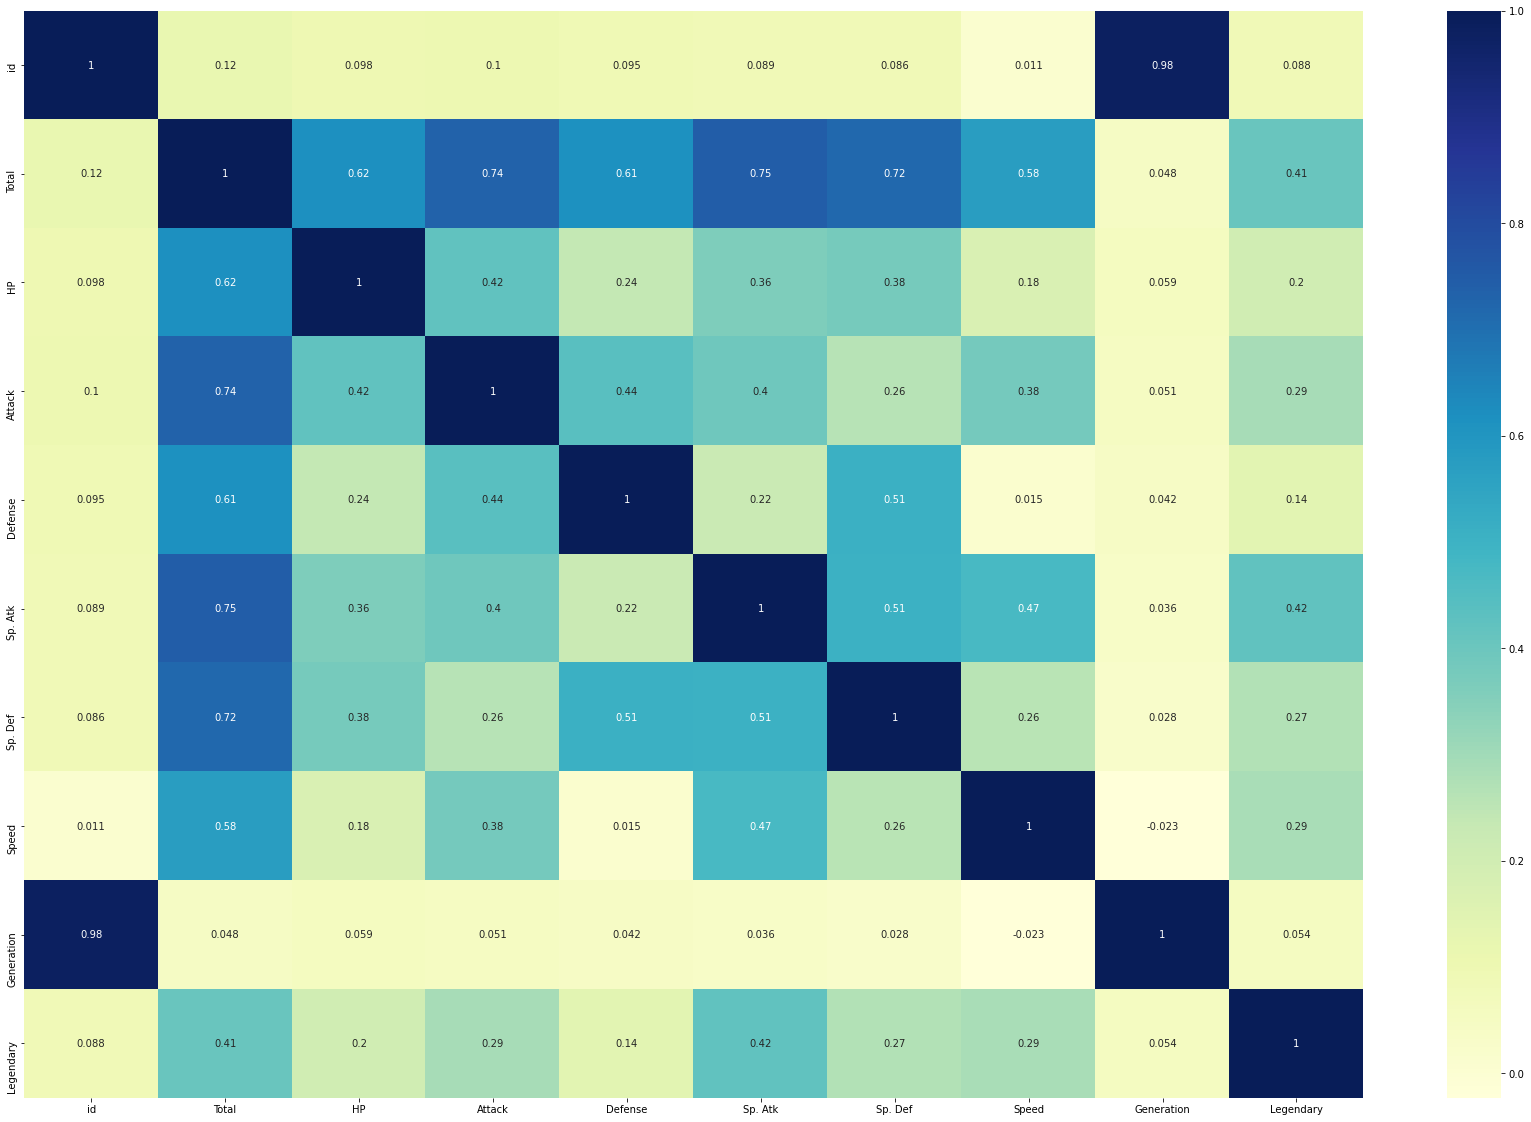

In [28]:
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

#### In the heatmap of correlation matrix the darker the color of tile the correlation between the variables is highly positive.And lighter the color of tile the correlation between the variables is highly negative.

### Pairplot between Legendary variable with other numeric variables
Pairwise Plot :- Used to plot relationship in a dataset

Creates scatter plots for join relationship and histogram for univariate distributions

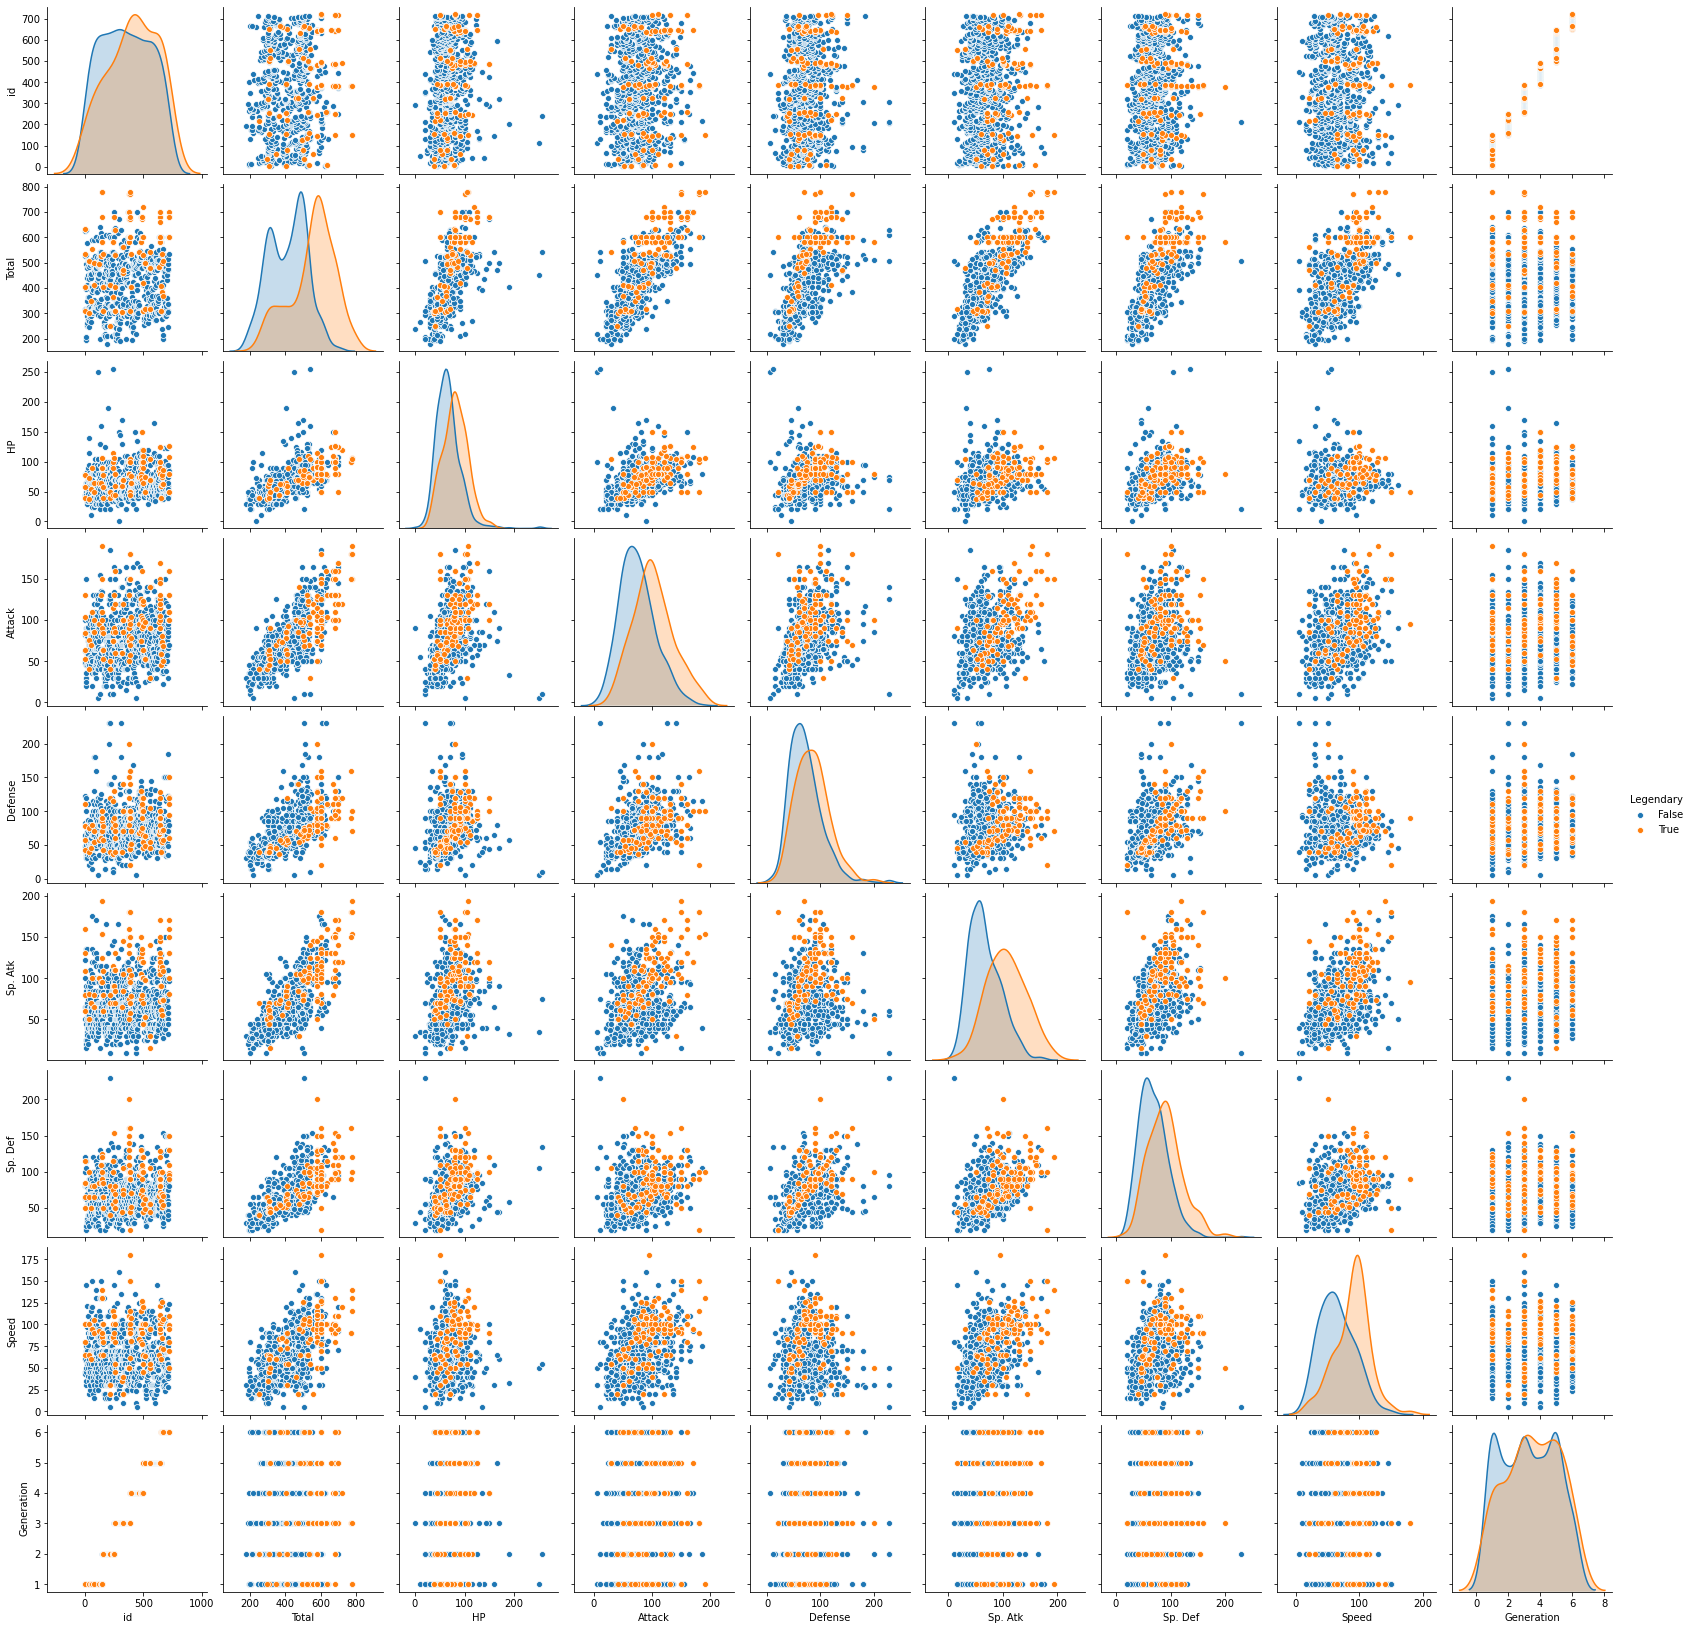

In [29]:
sns.pairplot(numeric_data, kind='scatter',hue='Legendary')

In [30]:
## Drop Type 2 and Beast columns and chack info
df_clean = df.drop(columns = ['Type 2','Beast'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 69.7+ KB


#### Plot a graph of frequency distribution of 'Type 1' pokemon

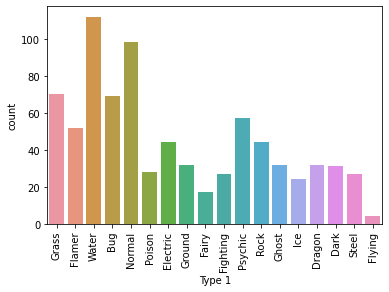

In [31]:
sns.countplot(x ='Type 1', data=df_clean)
plt.xticks(rotation='vertical')
plt.show()

Plot a graph of frequency distribution of 'Legendary' pokemon

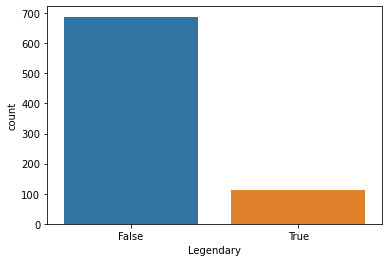

In [32]:
sns.countplot(x='Legendary', data=df_clean)
plt.show()

#### Box plot between 'Total' and 'Type 1' variable

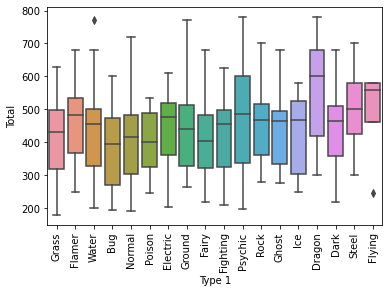

In [33]:
sns.boxplot(x='Type 1', y='Total', data = df_clean)
plt.xticks(rotation='vertical')
plt.show()

#### Boxplot between 'Legendary' and 'Total' variable

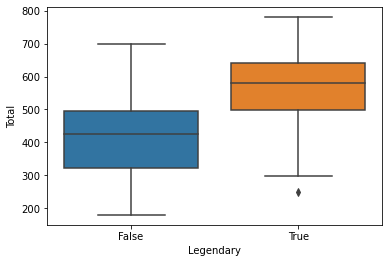

In [34]:
sns.boxplot(x='Legendary', y='Total', data = df_clean)
plt.show()

#### Box whiskers and histogram plot of 'Total' variable

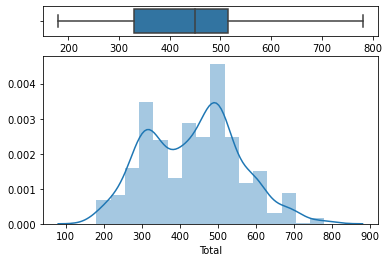

In [35]:
## Box whiskers plot & histogram on the same window 
## Split the plotting window into 2 parts

f, (ax_box, ax_hist)= plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
## Add and create  box plot
sns.boxplot(df_clean['Total'], ax=ax_box)

sns.distplot(df_clean["Total"], ax=ax_hist)
plt.show()

# PCA - Principal Component Analysis 
#### It is a linear dimensionality reduction technique. 

### Why PCA ?
####  Because there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge. Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.

In [36]:
##Principal Component Analysis(PCA) used for dimension reduction of dataset

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#### Selecting numeric columns in which PSA technique has to apply to reduce dimension 

In [37]:
pca_col =['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

#### Standardizing the data since PCA's output is influenced based on the scale of the features of the data.

In [38]:
scaler = StandardScaler()
scaler.fit(df_mod[pca_col])

StandardScaler()

In [39]:
scaled_data = scaler.transform(df_mod[pca_col])

#### While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

In [40]:
np.mean(scaled_data), np.std(scaled_data)

(-5.033011044967376e-17, 1.0)

#### It has been converted into array and this is based on Standard Deviation is 1 and Mean = 0.


In [41]:
scaled_data

array([[-0.95062622, -0.92490618, -0.79715364, -0.2391303 , -0.24818854,
        -0.80150318],
       [-0.3628221 , -0.5241302 , -0.34791742,  0.21955954,  0.29115635,
        -0.28501525],
       [ 0.42091674,  0.09244823,  0.29384863,  0.83114599,  1.01028289,
         0.40363531],
       ...,
       [ 0.42091674,  0.95565803, -0.44418232,  2.36011211,  2.08897269,
         0.05931003],
       [ 0.42091674,  2.49710411, -0.44418232,  2.97169856,  2.08897269,
         0.40363531],
       [ 0.42091674,  0.95565803,  1.4811158 ,  1.74852566,  0.65071962,
         0.05931003]])

#### Let's convert the normalized features into a tabular format with the help of DataFrame

In [42]:
feature_cols = ['feature'+str(i) for i in range(scaled_data.shape[1])]
normalised_pokemon = pd.DataFrame(scaled_data,columns=feature_cols)
normalised_pokemon.tail()

,feature0,feature1,feature2,feature3,feature4,feature5
795,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341
796,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611
797,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310
798,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635
799,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310


### Use the sklearn library to import the PCA module

In [43]:
from sklearn.decomposition import PCA

#### Projecting the six-dimensional data to two-dimensional principal components. You will pass the number of components (n_components=0.6) and finally call fit_transform on the aggregate data.

In [52]:
pca = PCA(n_components = 0.6)
principal_components =pca.fit(scaled_data)

In [53]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(800, 6)

#### Shape of dataframe after PCA reduction technique.

In [54]:
x_pca.shape

(800, 2)

### Let's create a DataFrame that will have the principal component values for all 800 samples.

In [55]:
principal_comp_df = pd.DataFrame(data = x_pca, columns = ['Principal_comp_1', 'Principal_comp_2'])
principal_comp_df.head(4)

,Principal_comp_1,Principal_comp_2
0,-1.556375,-0.021482
1,-0.362867,-0.050269
2,1.280152,-0.062720
3,2.620916,0.704263


In [56]:
## Make a correlation matrix of PCA dataframe
correlation_mat = principal_comp_df.corr()
correlation_mat

,Principal_comp_1,Principal_comp_2
Principal_comp_1,1.000000e+00,-3.610644e-17
Principal_comp_2,-3.610644e-17,1.000000e+00


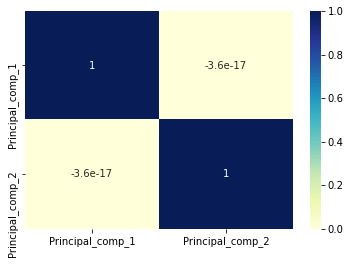

In [57]:
## PLot correlation matrix for better understanding
sns.heatmap(correlation_mat, annot=True, cmap='YlGnBu' )
plt.show()

### Now, find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [58]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.45190665 0.18225358]


In [65]:
data_labels = df["Name"].copy()
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Flamer       52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

### Now, plot PCA variables w.r.t Type 1 Pokemon

<Figure size 432x288 with 0 Axes>

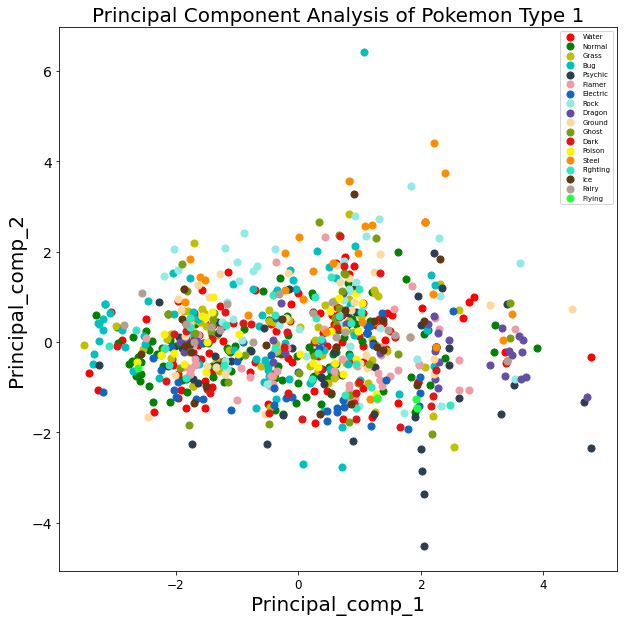

In [80]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal_comp_1',fontsize=20)
plt.ylabel('Principal_comp_2',fontsize=20)
plt.title("Principal Component Analysis of Pokemon Type 1",fontsize=20)
targets = ['Water','Normal','Grass','Bug','Psychic','Flamer','Electric','Rock','Dragon','Ground','Ghost',        
'Dark', 'Poison', 'Steel','Fighting','Ice','Fairy','Flying']
colors = ['r', 'g', 'y','c','#2c3e50','#ee9ca7','#1565C0','#91EAE4','#654ea3','#ffd89b','#799F0C','#dd1818',
         '#FFF200','#FF8C00','#30E8BF','#603813','#b29f94','#24FE41','#a80077']
for target, color in zip(targets,colors):
    indicesToKeep = df['Type 1'] == target
    plt.scatter(principal_comp_df.loc[indicesToKeep, 'Principal_comp_1']
               , principal_comp_df.loc[indicesToKeep, 'Principal_comp_2'], c = color, s = 50)

plt.legend(targets,prop={'size': 7})
plt.show()